using CNN's for the same fashion MNIST

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_img , train_label) , (test_img , test_label) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
train_img = train_img/255.0
test_img = test_img/255.0

well time to properly define our CNN to improve the DNN's capabilities

In [8]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3) , activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64 , (3,3) , activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
 ])

# NOT USING tf.nn.{method} HERE FOR A CHANGE , THIS WORKS AS WELL !!!

# MIGHT AS WELL DO MODEL SUMMARY TO LOOK AT HOW THE IMGS GET COMPRESSED IN EACH STEP OF THIS DNN LAYER

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 862,410 (3.29 MB)

 Trainable params: 862,410 (3.29 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
class EarlyStopping(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('accuracy') >= .98 :
      self.model.stop_training = True

In [10]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
model.fit(train_img,train_label,epochs=100,callbacks=[EarlyStopping()])

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 102s 53ms/step - accuracy: 0.7947 - loss: 0.5602
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 53ms/step - accuracy: 0.8922 - loss: 0.2830
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 53ms/step - accuracy: 0.9150 - loss: 0.2282
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 53ms/step - accuracy: 0.9255 - loss: 0.1975
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 53ms/step - accuracy: 0.9397 - loss: 0.1607
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 52ms/step - accuracy: 0.9479 - loss: 0.1377
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 53ms/step - accuracy: 0.9576 - loss: 0.1116
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 54ms/step - accuracy: 0.9660 - loss: 0.0905
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 100s 54ms/step - accuracy: 0.9735 - loss: 0.0717
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 54ms/step - accuracy: 0.9761 - loss: 0.0617
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 100s 53ms/step - accuracy: 0.9805 -

In [12]:
model.evaluate(test_img,test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9032 - loss: 0.4096


[0.40490400791168213, 0.9057999849319458]

Visualizing Convolutions & Pooling :

In [13]:
print(f'first 100 convolutions : \n\n{test_label[:100]}')

print(f'\n Shoes : {[i for i in range(100) if test_label[:100][i]==9]}')

first 100 convolutions : 

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]

 Shoes : [0, 23, 28, 39, 68, 83]


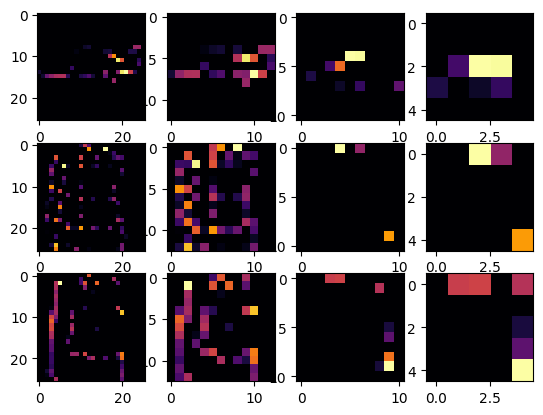

In [15]:
first_img = 9
second_img = 7
third_img = 10

convolution_number = 1

layers_to_visualize = [tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D]

layer_outputs = [layer.output for layer in model.layers if type(layer) in layers_to_visualize]
activation_model = tf.keras.models.Model(inputs = model.inputs , outputs = layer_outputs)

f,axarr = plt.subplots(3,len(layer_outputs))

for i in range(len(layer_outputs)):

  f1 = activation_model.predict(test_img[first_img].reshape(1,28,28,1), verbose = False)[i]
  axarr[0][i].imshow(f1[0, : , : , convolution_number],cmap='inferno')
  axarr[0][i].grid(False)

  f2 = activation_model.predict(test_img[second_img].reshape(1,28,28,1), verbose = False)[i]
  axarr[1][i].imshow(f2[0, : , : , convolution_number],cmap='inferno')
  axarr[1][i].grid(False)

  f3 = activation_model.predict(test_img[third_img].reshape(1,28,28,1), verbose = False)[i]
  axarr[2][i].imshow(f3[0, : , : , convolution_number],cmap='inferno')
  axarr[2][i].grid(False)